# Visualise Data Distribution of Different Sampling Methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 

# logarithmic grid sampling using np.logspace

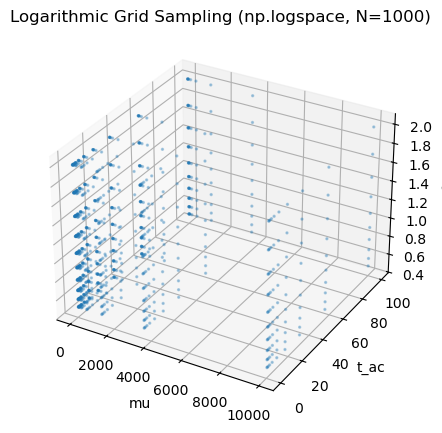

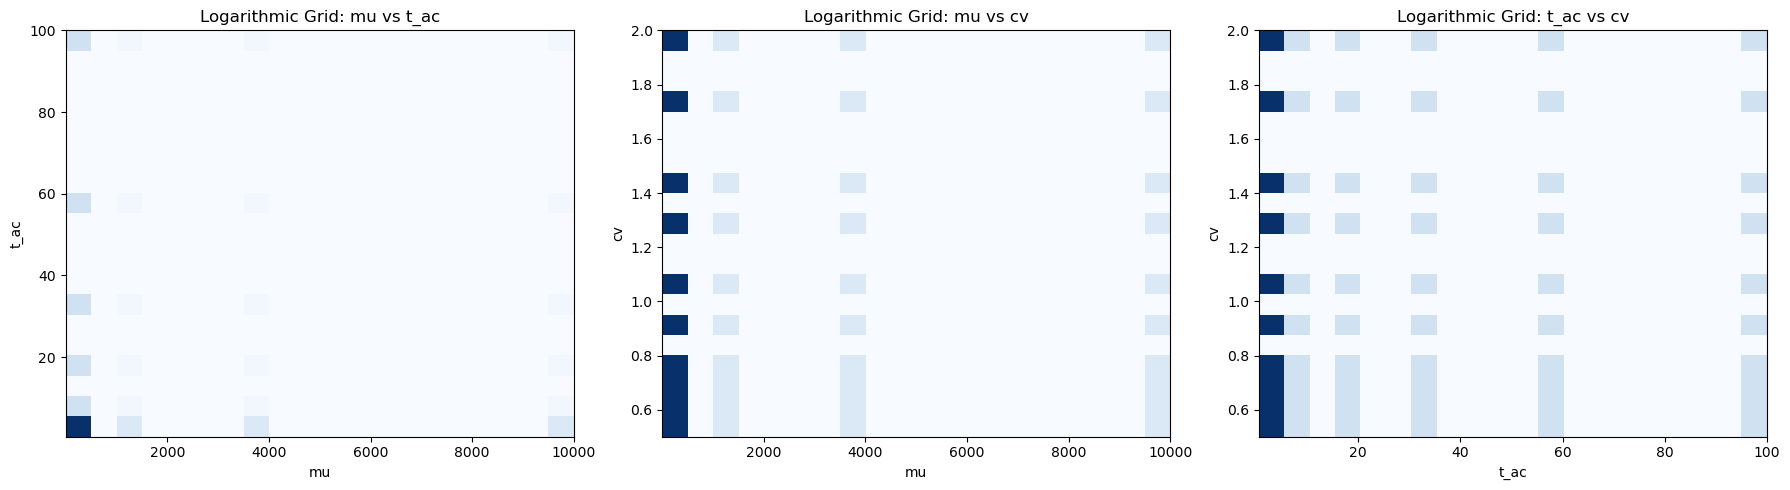

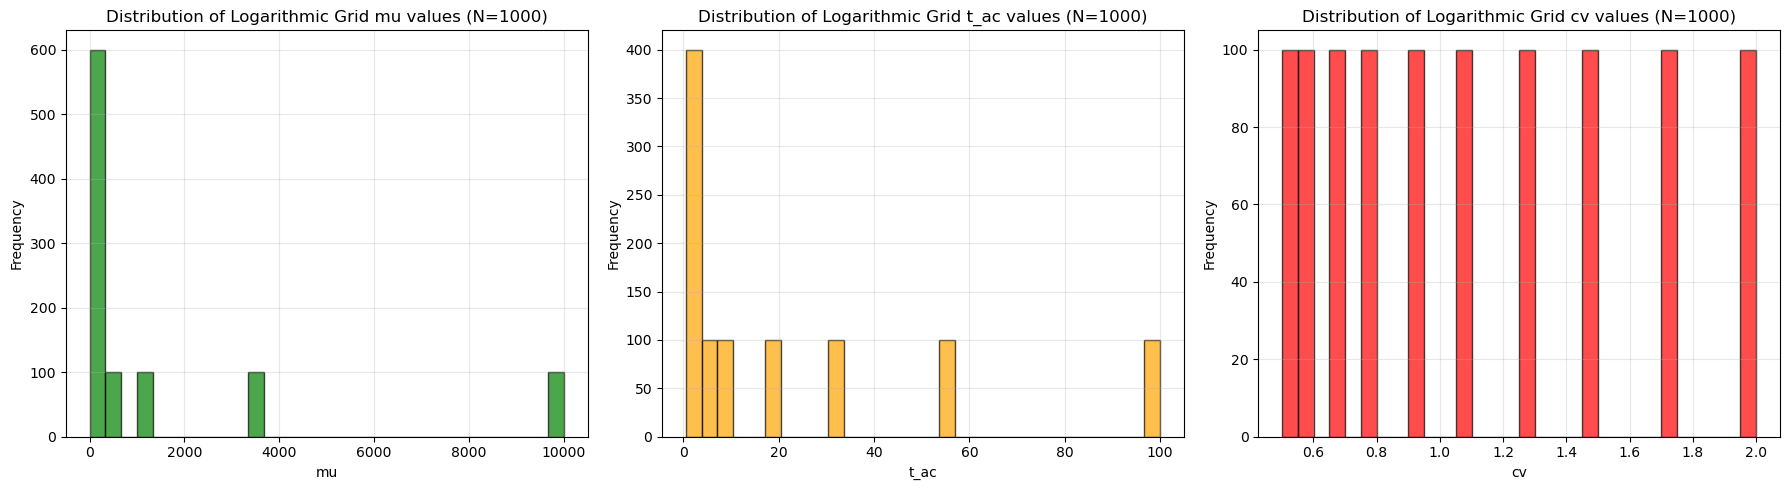

In [2]:
# Logarithmic Grid Sampling using np.logspace
mu_target = np.logspace(0, 4, 10)  # 1 to 10,000 (log scale)
t_ac_target = np.logspace(-0.3, 2, 10)  # ~0.5 to 100 (log scale)
cv_target = np.logspace(-0.3, np.log10(2), 10)  # ~0.5 to 2.0 (log scale)

# Create all combinations using meshgrid (logarithmic grid)
targets = np.array(np.meshgrid(mu_target, t_ac_target, cv_target)).T.reshape(-1, 3)
N = len(targets)  # Total number of grid points = 10×10×10 = 1000

# 3D scatter plot of logarithmic grid
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(targets[:, 0], targets[:, 1], targets[:, 2], s=2, alpha=0.3)
ax.set_xlabel('mu')
ax.set_ylabel('t_ac')
ax.set_zlabel('cv')
ax.set_title(f'Logarithmic Grid Sampling (np.logspace, N={N})')
plt.show()

# 2D histograms for pairwise parameter combinations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist2d(targets[:, 0], targets[:, 1], bins=20, cmap='Blues')
axes[0].set_xlabel('mu')
axes[0].set_ylabel('t_ac')
axes[0].set_title('Logarithmic Grid: mu vs t_ac')

axes[1].hist2d(targets[:, 0], targets[:, 2], bins=20, cmap='Blues')
axes[1].set_xlabel('mu')
axes[1].set_ylabel('cv')
axes[1].set_title('Logarithmic Grid: mu vs cv')

axes[2].hist2d(targets[:, 1], targets[:, 2], bins=20, cmap='Blues')
axes[2].set_xlabel('t_ac')
axes[2].set_ylabel('cv')
axes[2].set_title('Logarithmic Grid: t_ac vs cv')

plt.tight_layout()
plt.show()

# Distribution plots for logarithmic grid parameters
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(targets[:, 0], bins=30, color='green', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('mu')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Logarithmic Grid mu values (N=1000)')
axes[0].grid(True, alpha=0.3)

axes[1].hist(targets[:, 1], bins=30, color='orange', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('t_ac')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Logarithmic Grid t_ac values (N=1000)')
axes[1].grid(True, alpha=0.3)

axes[2].hist(targets[:, 2], bins=30, color='red', alpha=0.7, edgecolor='black')
axes[2].set_xlabel('cv')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Logarithmic Grid cv values (N=1000)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Uniform Grid Sampling using np.linspace

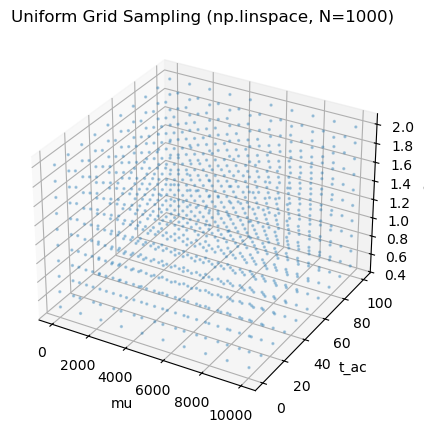

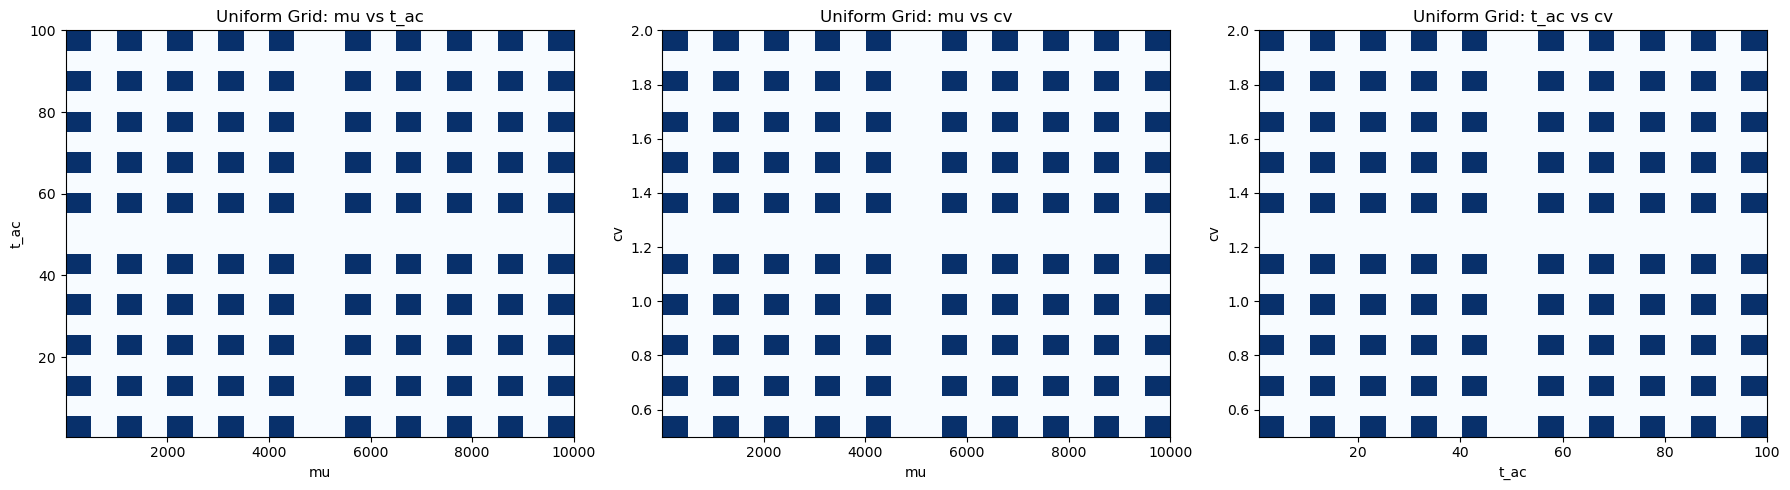

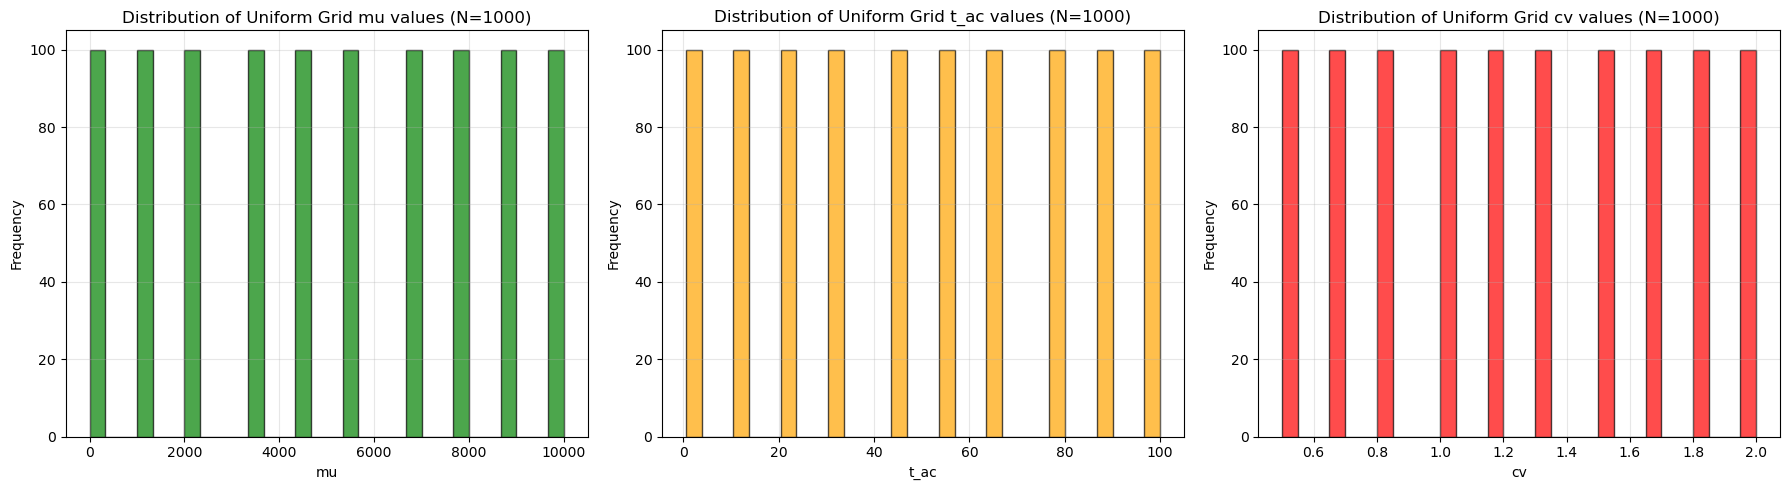

In [3]:
# Uniform Grid Sampling using np.linspace
mu_target = np.linspace(1, 10000, 10)  # 1 to 10,000 (uniform scale)
t_ac_target = np.linspace(0.5, 100, 10)  # 0.5 to 100 (uniform scale)
cv_target = np.linspace(0.5, 2, 10)  # 0.5 to 2.0 (uniform scale)

# Create all combinations using meshgrid (uniform grid)
targets = np.array(np.meshgrid(mu_target, t_ac_target, cv_target)).T.reshape(-1, 3)
N = len(targets)  # Total number of grid points = 10×10×10 = 1000

# 3D scatter plot of uniform grid
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(targets[:, 0], targets[:, 1], targets[:, 2], s=2, alpha=0.3)
ax.set_xlabel('mu')
ax.set_ylabel('t_ac')
ax.set_zlabel('cv')
ax.set_title(f'Uniform Grid Sampling (np.linspace, N={N})')
plt.show()

# 2D histograms for pairwise parameter combinations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist2d(targets[:, 0], targets[:, 1], bins=20, cmap='Blues')
axes[0].set_xlabel('mu')
axes[0].set_ylabel('t_ac')
axes[0].set_title('Uniform Grid: mu vs t_ac')

axes[1].hist2d(targets[:, 0], targets[:, 2], bins=20, cmap='Blues')
axes[1].set_xlabel('mu')
axes[1].set_ylabel('cv')
axes[1].set_title('Uniform Grid: mu vs cv')

axes[2].hist2d(targets[:, 1], targets[:, 2], bins=20, cmap='Blues')
axes[2].set_xlabel('t_ac')
axes[2].set_ylabel('cv')
axes[2].set_title('Uniform Grid: t_ac vs cv')

plt.tight_layout()
plt.show()

# Distribution plots for uniform grid parameters
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(targets[:, 0], bins=30, color='green', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('mu')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Uniform Grid mu values (N=1000)')
axes[0].grid(True, alpha=0.3)

axes[1].hist(targets[:, 1], bins=30, color='orange', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('t_ac')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Uniform Grid t_ac values (N=1000)')
axes[1].grid(True, alpha=0.3)

axes[2].hist(targets[:, 2], bins=30, color='red', alpha=0.7, edgecolor='black')
axes[2].set_xlabel('cv')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Uniform Grid cv values (N=1000)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Solbol-sampled parameter space
This section verifies that Sobol sampling covers the parameter space evenly.

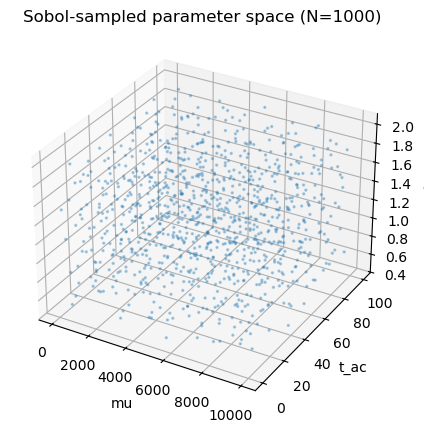

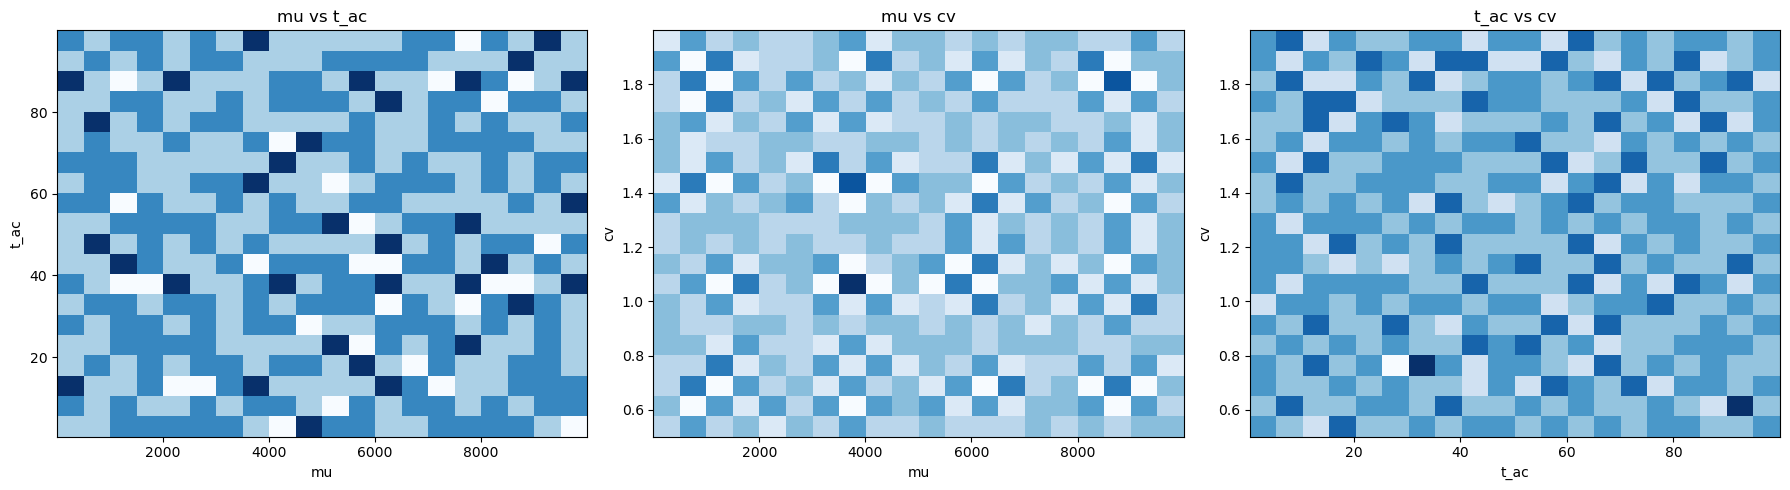

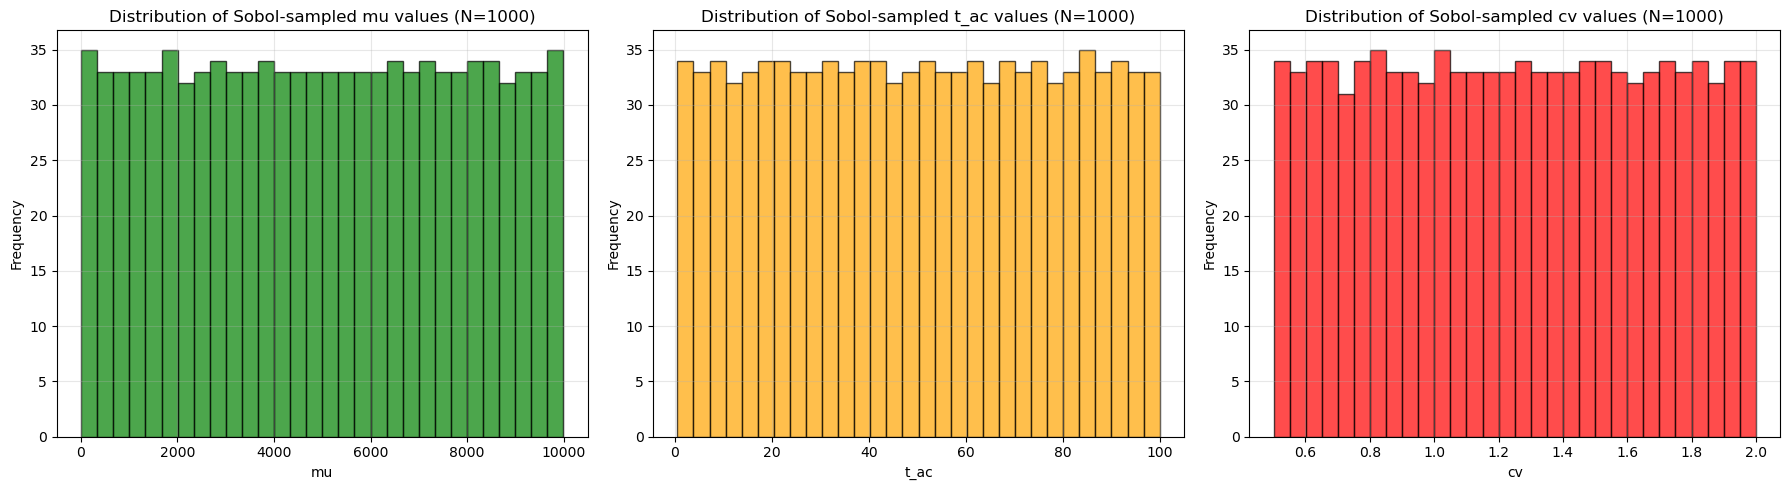

In [4]:
from scipy.stats import qmc
# replace the 10×10×10 grid with N Sobol samples
N = 1000  # or any budget you prefer
sobol = qmc.Sobol(d=3, scramble=True, seed=42)
U = sobol.random_base2(int(np.ceil(np.log2(N))))[:N]  # N points in [0,1)^3

mu_target  = qmc.scale(U[:,0:1], [1], [10_000])      # map to [1, 10000]
tacs_target = qmc.scale(U[:,1:2], [0.5], [100])      # map to [0.5, 100]
cvs_target  = qmc.scale(U[:,2:3], [0.5], [2.0])      # map to [0.5, 2.0]

# Flatten the arrays since qmc.scale returns 2D arrays
mu_target = mu_target.flatten()
tacs_target = tacs_target.flatten()
cvs_target = cvs_target.flatten()

# plot for mu_target, tacs_target and cvs_target here
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mu_target, tacs_target, cvs_target, s=2, alpha=0.3)
ax.set_xlabel('mu')
ax.set_ylabel('t_ac')
ax.set_zlabel('cv')
ax.set_title(f'Sobol-sampled parameter space (N={N})')
plt.show()

fig, axes = plt.subplots(1,3, figsize=(18,5))
axes[0].hist2d(mu_target, tacs_target, bins=20, cmap='Blues')
axes[0].set_xlabel('mu'); axes[0].set_ylabel('t_ac'); axes[0].set_title('mu vs t_ac')
axes[1].hist2d(mu_target, cvs_target, bins=20, cmap='Blues')
axes[1].set_xlabel('mu'); axes[1].set_ylabel('cv'); axes[1].set_title('mu vs cv')
axes[2].hist2d(tacs_target, cvs_target, bins=20, cmap='Blues')
axes[2].set_xlabel('t_ac'); axes[2].set_ylabel('cv'); axes[2].set_title('t_ac vs cv')
plt.tight_layout()
plt.show()

# Distribution plots for Sobol-sampled parameters
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(mu_target, bins=30, color='green', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('mu')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Sobol-sampled mu values (N=1000)')
axes[0].grid(True, alpha=0.3)

axes[1].hist(tacs_target, bins=30, color='orange', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('t_ac')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Sobol-sampled t_ac values (N=1000)')
axes[1].grid(True, alpha=0.3)

axes[2].hist(cvs_target, bins=30, color='red', alpha=0.7, edgecolor='black')
axes[2].set_xlabel('cv')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Sobol-sampled cv values (N=1000)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Combine the plots

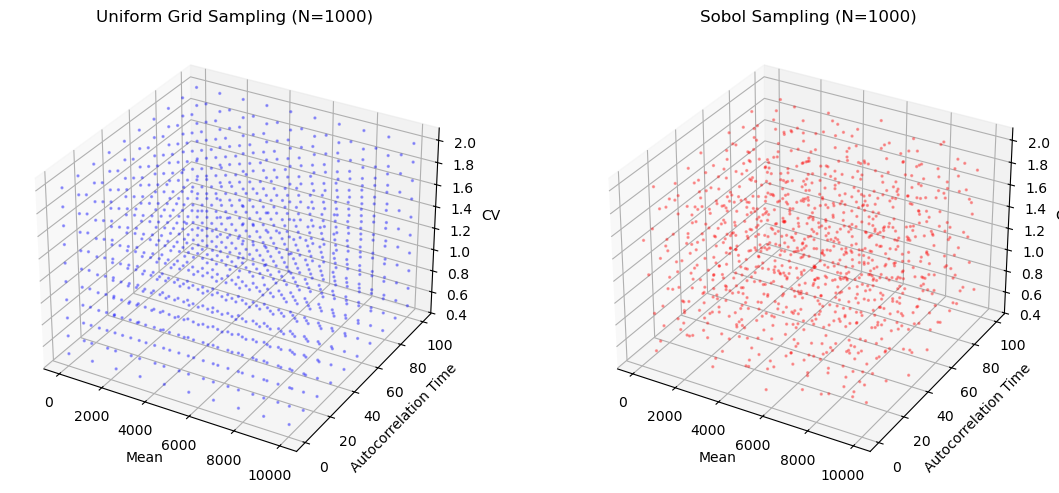

In [10]:
# Create a side-by-side comparison of Uniform Grid and Sobol sampling
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), subplot_kw={'projection': '3d'})

# Uniform Grid plot
ax1.scatter(targets[:, 0], targets[:, 1], targets[:, 2], s=2, alpha=0.3, color='blue')
ax1.set_xlabel('Mean')
ax1.set_ylabel('Autocorrelation Time')
ax1.set_zlabel('CV')
ax1.set_title(f'Uniform Grid Sampling (N={len(targets)})')

# Sobol sampling plot
ax2.scatter(mu_target, tacs_target, cvs_target, s=2, alpha=0.3, color='red')
ax2.set_xlabel('Mean')
ax2.set_ylabel('Autocorrelation Time')
ax2.set_zlabel('CV')
ax2.set_title(f'Sobol Sampling (N={len(mu_target)})')

plt.tight_layout()
plt.show()


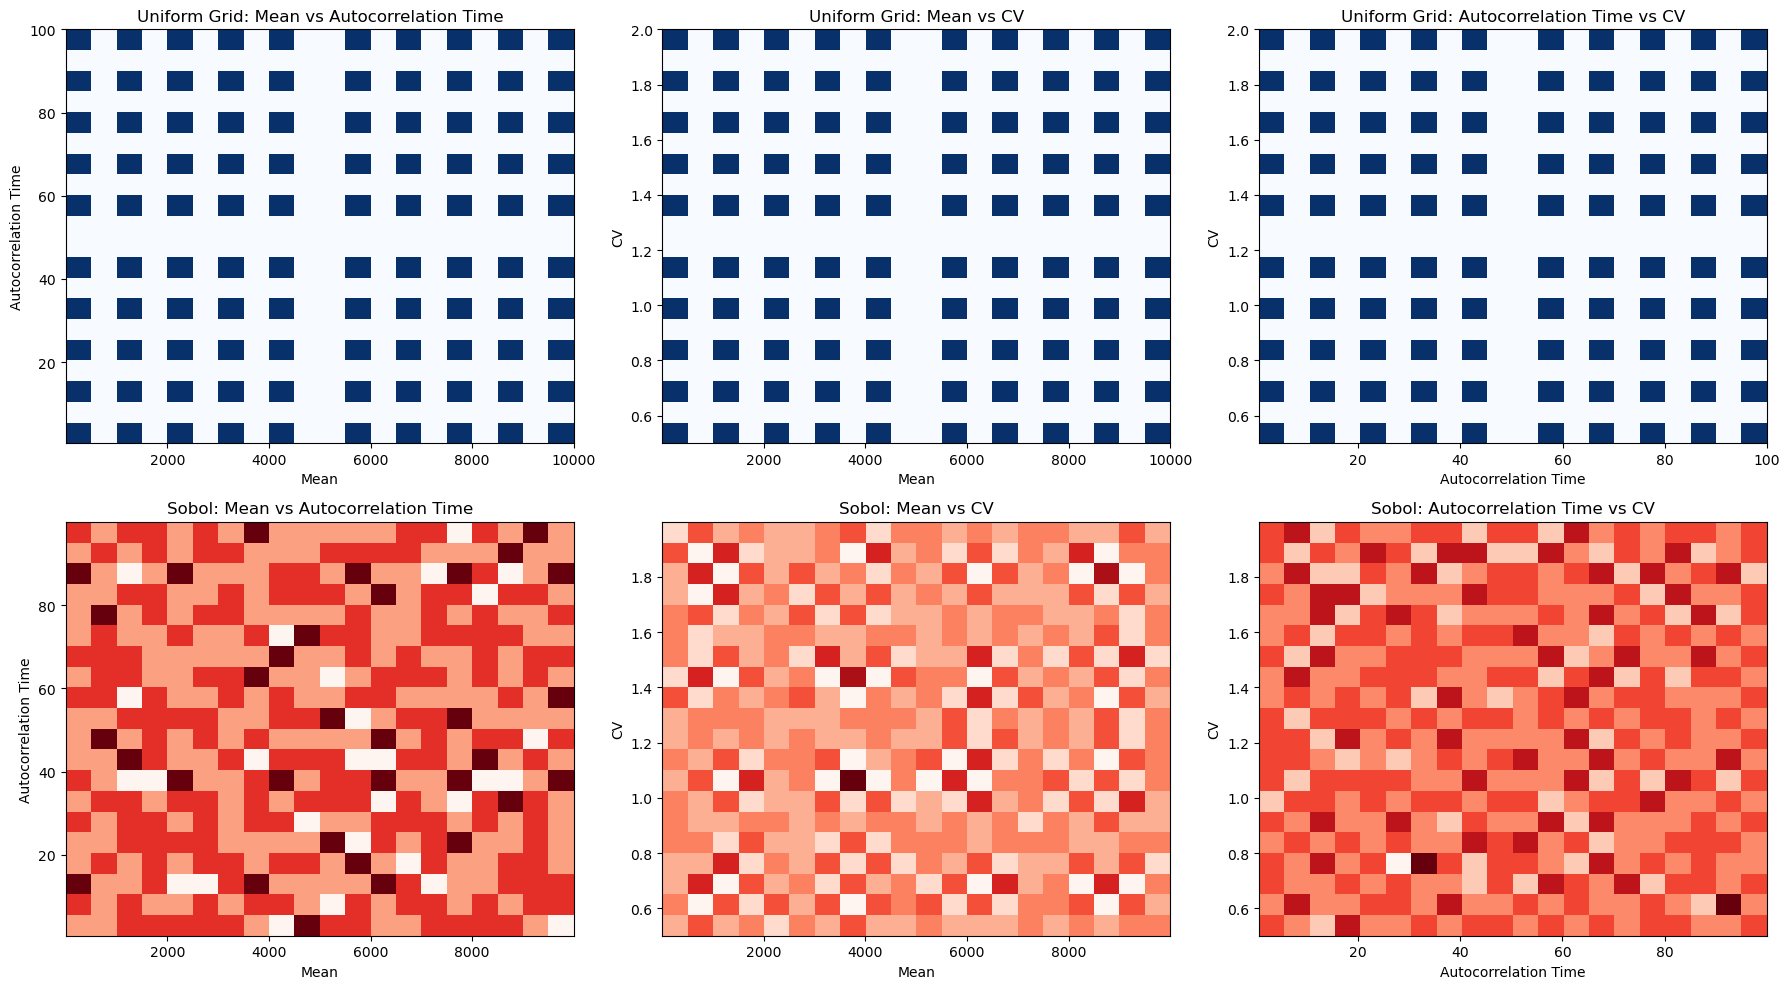

In [11]:
# 2D histograms for pairwise parameter combinations - Uniform Grid vs Sobol
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Top row: Uniform Grid
axes[0, 0].hist2d(targets[:, 0], targets[:, 1], bins=20, cmap='Blues')
axes[0, 0].set_xlabel('Mean')
axes[0, 0].set_ylabel('Autocorrelation Time')
axes[0, 0].set_title('Uniform Grid: Mean vs Autocorrelation Time')

axes[0, 1].hist2d(targets[:, 0], targets[:, 2], bins=20, cmap='Blues')
axes[0, 1].set_xlabel('Mean')
axes[0, 1].set_ylabel('CV')
axes[0, 1].set_title('Uniform Grid: Mean vs CV')

axes[0, 2].hist2d(targets[:, 1], targets[:, 2], bins=20, cmap='Blues')
axes[0, 2].set_xlabel('Autocorrelation Time')
axes[0, 2].set_ylabel('CV')
axes[0, 2].set_title('Uniform Grid: Autocorrelation Time vs CV')

# Bottom row: Sobol
axes[1, 0].hist2d(mu_target, tacs_target, bins=20, cmap='Reds')
axes[1, 0].set_xlabel('Mean')
axes[1, 0].set_ylabel('Autocorrelation Time')
axes[1, 0].set_title('Sobol: Mean vs Autocorrelation Time')

axes[1, 1].hist2d(mu_target, cvs_target, bins=20, cmap='Reds')
axes[1, 1].set_xlabel('Mean')
axes[1, 1].set_ylabel('CV')
axes[1, 1].set_title('Sobol: Mean vs CV')

axes[1, 2].hist2d(tacs_target, cvs_target, bins=20, cmap='Reds')
axes[1, 2].set_xlabel('Autocorrelation Time')
axes[1, 2].set_ylabel('CV')
axes[1, 2].set_title('Sobol: Autocorrelation Time vs CV')

plt.tight_layout()
plt.show()

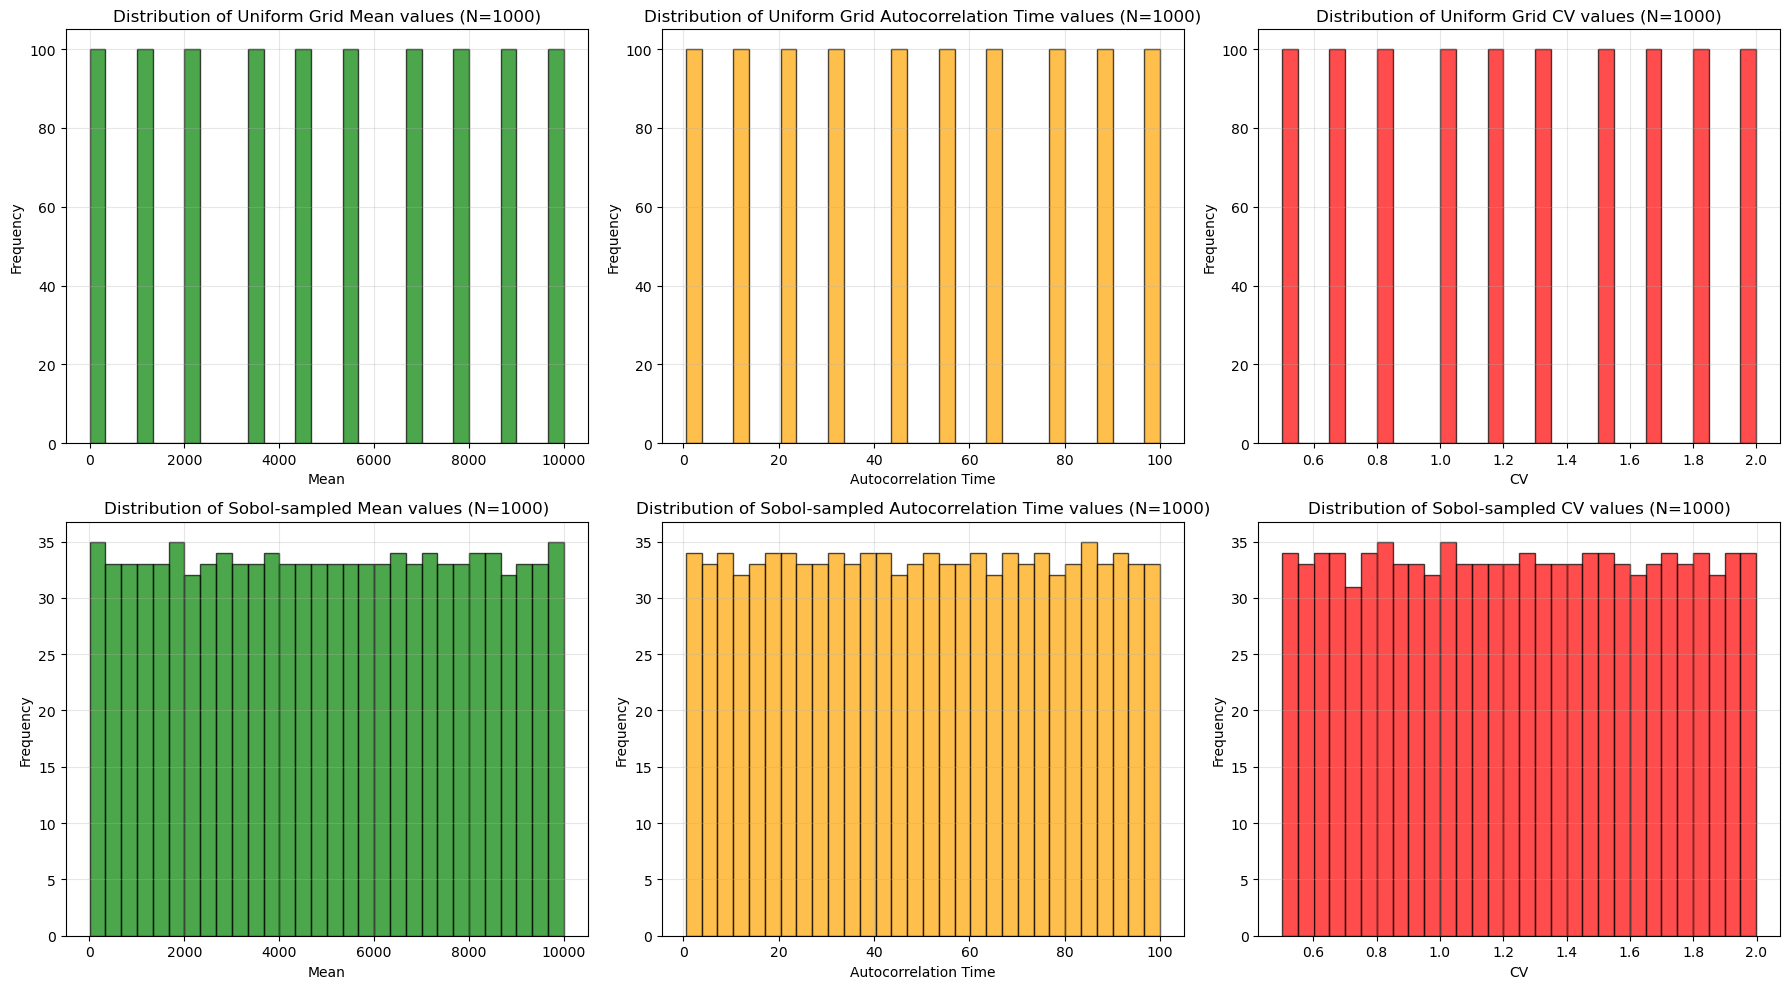

In [12]:
# Distribution plots comparison: Uniform Grid (top) vs Sobol (bottom)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Top row: Uniform Grid distributions
axes[0, 0].hist(targets[:, 0], bins=30, color='green', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Mean')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Uniform Grid Mean values (N=1000)')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(targets[:, 1], bins=30, color='orange', alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Autocorrelation Time')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Uniform Grid Autocorrelation Time values (N=1000)')
axes[0, 1].grid(True, alpha=0.3)

axes[0, 2].hist(targets[:, 2], bins=30, color='red', alpha=0.7, edgecolor='black')
axes[0, 2].set_xlabel('CV')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Distribution of Uniform Grid CV values (N=1000)')
axes[0, 2].grid(True, alpha=0.3)

# Bottom row: Sobol distributions
axes[1, 0].hist(mu_target, bins=30, color='green', alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Mean')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Sobol-sampled Mean values (N=1000)')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(tacs_target, bins=30, color='orange', alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Autocorrelation Time')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Sobol-sampled Autocorrelation Time values (N=1000)')
axes[1, 1].grid(True, alpha=0.3)

axes[1, 2].hist(cvs_target, bins=30, color='red', alpha=0.7, edgecolor='black')
axes[1, 2].set_xlabel('CV')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Distribution of Sobol-sampled CV values (N=1000)')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
